In [203]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [204]:
data = pd.read_csv(r"C:\Users\Pushpanjali\Desktop\DEEP Learning\ipl.csv", index_col=0,header=0)

In [205]:
data.head(15)

,Player Name,Type,Price Cr,Team
0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings
2,Deepak Chahar,Bowler,14.00,Chennai Super Kings
3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings
4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings
5,Ambati Rayudu,Batter,6.75,Chennai Super Kings
6,Ruturaj Gaikwad,Batter,6.00,Chennai Super Kings
7,Shivam Dube,All-Rounder,4.00,Chennai Super Kings
8,Mitchell Santner,All-Rounder,1.90,Chennai Super Kings
9,Rajvardhan Hangargekar,Bowler,1.50,Chennai Super Kings


In [206]:
data.describe()

,Price Cr
count,243.000000
mean,3.746914
std,4.584679
min,0.200000
25%,0.225000
50%,1.500000
75%,6.375000
max,18.500000


In [207]:
print(data.shape)

(568, 4)


In [208]:
data.columns

Index(['Player Name', 'Type', 'Price Cr', 'Team'], dtype='object')

In [209]:
data.sum()

Player Name    Ben Stokes Ravindra Jadeja Deepak Chahar MS Dh...
Type           All-RounderAll-RounderBowlerWicket-KeeperAll-R...
Price Cr                                                   910.5
Team           Chennai Super KingsChennai Super KingsChennai ...
dtype: object

In [210]:
data.dtypes

Player Name     object
Type            object
Price Cr       float64
Team            object
dtype: object

In [211]:
Teams = data.Team.value_counts()

In [212]:
Teams = Teams.reset_index()

In [213]:
Teams = Teams.rename(columns = {'index':'Team_name','Team':'Player_Count'})

In [214]:
Teams[Teams['Team_name'] != 'Unsold']['Team_name']

1                 Gujarat Titans
2            Chennai Super Kings
3                 Delhi Capitals
4           Lucknow Super Giants
5    Royal Challengers Bangalore
6               Rajasthan Royals
7            Sunrisers Hyderabad
8                 Mumbai Indians
9                   Punjab Kings
Name: Team_name, dtype: object

In [215]:
Teams.head()

,Team_name,Player_Count
0,Unsold,325
1,Gujarat Titans,47
2,Chennai Super Kings,25
3,Delhi Capitals,25
4,Lucknow Super Giants,25


### Highest Paid Player 

In [216]:
Highest_Paid_Player = data[['Team','Price Cr','Player Name']].groupby(
    ['Team'],as_index=False).agg({'Price Cr':'max','Player Name':'first'}).sort_values('Price Cr',ascending = False)

In [217]:
Highest_Paid_Player

,Team,Price Cr,Player Name
5,Punjab Kings,18.50,Sam Curran
4,Mumbai Indians,17.50,Cameron Green
3,Lucknow Super Giants,17.00,KL Rahul
0,Chennai Super Kings,16.25,Ben Stokes
1,Delhi Capitals,16.00,Rishabh Pant
2,Gujarat Titans,16.00,Hardik Pandya
7,Royal Challengers Bangalore,15.00,Virat Kohli
6,Rajasthan Royals,14.00,Sanju Samson
8,Sunrisers Hyderabad,13.25,Harry Brook
9,Unsold,NaN,Tom Banton


###  Total Amount Spend 

In [220]:
ipl_teams_total_Spending = data[["Team", "Price Cr"]].groupby(
     ["Team"],as_index=False).sum().sort_values("Price Cr", ascending = False)

In [221]:
ipl_teams_total_Spending

,Team,Price Cr
2,Gujarat Titans,183.90
4,Mumbai Indians,94.95
0,Chennai Super Kings,93.50
7,Royal Challengers Bangalore,93.25
6,Rajasthan Royals,91.65
3,Lucknow Super Giants,91.45
1,Delhi Capitals,90.55
8,Sunrisers Hyderabad,88.45
5,Punjab Kings,82.80
9,Unsold,0.00


### Finding Missing Value 

In [222]:
data.isnull().sum()

Player Name      0
Type             0
Price Cr       325
Team             0
dtype: int64

### Droping the missing value 

In [223]:
data['Price Cr'].fillna(value=data['Price Cr'].mean(),inplace=True)

In [224]:
data.isnull().sum()

Player Name    0
Type           0
Price Cr       0
Team           0
dtype: int64

In [225]:
# price of unsold player
data.groupby('Team')['Price Cr'].sum().sort_values(ascending=False)

Team
Unsold                         1217.746914
Gujarat Titans                  183.900000
Mumbai Indians                   94.950000
Chennai Super Kings              93.500000
Royal Challengers Bangalore      93.250000
Rajasthan Royals                 91.650000
Lucknow Super Giants             91.450000
Delhi Capitals                   90.550000
Sunrisers Hyderabad              88.450000
Punjab Kings                     82.800000
Name: Price Cr, dtype: float64

In [226]:
# unsold player each team has
data['Team'].value_counts()

Unsold                         325
Gujarat Titans                  47
Chennai Super Kings             25
Delhi Capitals                  25
Lucknow Super Giants            25
Royal Challengers Bangalore     25
Rajasthan Royals                25
Sunrisers Hyderabad             25
Mumbai Indians                  24
Punjab Kings                    22
Name: Team, dtype: int64

In [227]:
#overall expenditure according to there type of form
data.groupby('Type')['Price Cr'].sum().sort_values(ascending=False)

Type
All-Rounder      738.711111
Bowler           673.579012
Batter           422.995679
Wicket-Keeper    292.961111
Name: Price Cr, dtype: float64

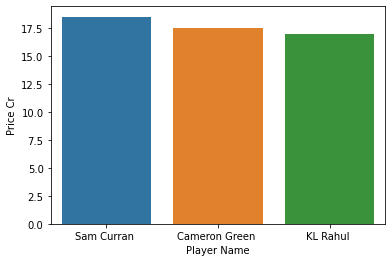

In [228]:
players = data.sort_values(by ='Price Cr',ascending=False).head(3)
sns.barplot(x='Player Name',y = 'Price Cr', data = players)
plt.show()

<AxesSubplot:xlabel='Player Name'>

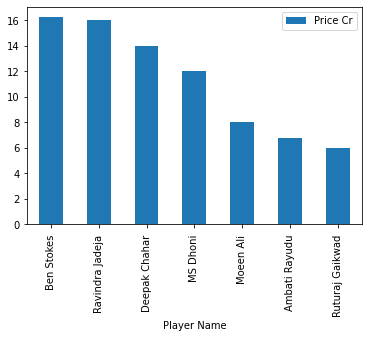

In [229]:
data = data.head(7)
data.plot.bar(x= "Player Name",y = "Price Cr")

In [230]:
data.groupby('Player Name')['Price Cr'].mean()

Player Name
Ambati Rayudu        6.75
Ben Stokes          16.25
Deepak Chahar       14.00
MS Dhoni            12.00
Moeen Ali            8.00
Ravindra Jadeja     16.00
Ruturaj Gaikwad      6.00
Name: Price Cr, dtype: float64

In [231]:
data=data.sort_values(by='Player Name',ascending=False)
data.head(10)

,Player Name,Type,Price Cr,Team
6,Ruturaj Gaikwad,Batter,6.00,Chennai Super Kings
1,Ravindra Jadeja,All-Rounder,16.00,Chennai Super Kings
4,Moeen Ali,All-Rounder,8.00,Chennai Super Kings
3,MS Dhoni,Wicket-Keeper,12.00,Chennai Super Kings
2,Deepak Chahar,Bowler,14.00,Chennai Super Kings
0,Ben Stokes,All-Rounder,16.25,Chennai Super Kings
5,Ambati Rayudu,Batter,6.75,Chennai Super Kings


### Lowest Paid Player 

In [232]:
lowest_paid_player= data[['Team','Price Cr','Player Name']].groupby(
    ['Team'],as_index=False).agg({'Price Cr':'min','Player Name':'first'}).sort_values('Price Cr',ascending = False)

In [233]:
lowest_paid_player

,Team,Price Cr,Player Name
0,Chennai Super Kings,6.0,Ruturaj Gaikwad
